In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading [Smoke Detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

[Real-time Smoke Detection with AI-based Sensor Fusion](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)

1) Load data, display column names and dataset size

In [64]:
smoke_train = pd.read_csv("./smoke_detection_iot.csv")
smoke_train.shape

(62630, 16)

In [65]:
# Print date where ["Fire Alarm"]==0
smoke_train[smoke_train["Fire Alarm"]==0]

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [66]:
# Print date where ["Fire Alarm"]==1
smoke_train[smoke_train["Fire Alarm"]==1]

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
3178,3178,1654736509,9.381,56.86,11,400,13347,20160,939.575,1.78,1.85,12.25,1.911,0.043,3178,1
3179,3179,1654736510,9.368,58.60,0,400,13385,20202,939.574,1.80,1.87,12.41,1.935,0.044,3179,1
3180,3180,1654736511,9.356,60.38,0,400,13388,20248,938.858,1.94,2.01,13.32,2.077,0.047,3180,1
3181,3181,1654736512,9.343,62.22,0,400,13443,20315,939.044,2.00,2.08,13.75,2.145,0.048,3181,1
3182,3182,1654736513,9.331,63.11,0,400,13457,20348,939.193,2.07,2.15,14.24,2.220,0.050,3182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51141,51141,1654904158,31.120,18.67,0,873,13077,20927,930.929,1.00,1.04,6.89,1.075,0.024,1153,1
51145,51145,1654712190,27.320,43.84,29,454,12858,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,1
51146,51146,1654712191,27.270,43.98,28,456,12860,20751,937.601,2.26,2.35,15.58,2.429,0.055,4,1
56889,56889,1655124311,20.191,43.84,29,454,12858,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,1


In [67]:
# Print description of dataset
smoke_train.describe()

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


##  Dataset features in detail
1. **UTC**: Timestamp UTC seconds
2. **Air Temperature**
3. **Air Humidity**
4. **TVOC**: Total Volatile Organic Compounds; measured in parts per billion (Source) <Летючі органічні сполуки (ЛОС) - це органічні сполуки, які мають високий тиск пари при кімнатній температурі. Високий тиск пари корелює з низькою точкою кипіння, яка пов’язана з кількістю молекул зразка в навколишньому повітрі, характеристика, відома як летючість.>
5. **eCO2**: co2 equivalent concentration; calculated from different values like TVCO
6. **Raw H2**: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
7. **Raw Ethanol**: raw ethanol gas (Source)
8. **Air Pressure**
9. **PM 1.0** and **PM 2.5**: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
10. **NC0.5/NC1.0** and **NC2.5**: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
11. **CNT**: Sample counter
12. **Fire Alarm**: ground truth is "1" if a fire is there


In [68]:
smoke_train['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

2) Process data gaps (delete or proof that there aren't any)

In [69]:
smoke_train.dropna(how="any")
smoke_train.shape
# none of the rows are being dropped

(62630, 16)

3) Visualize data
    - heatmap
    - histogram of feature distribution
    - features boxplot

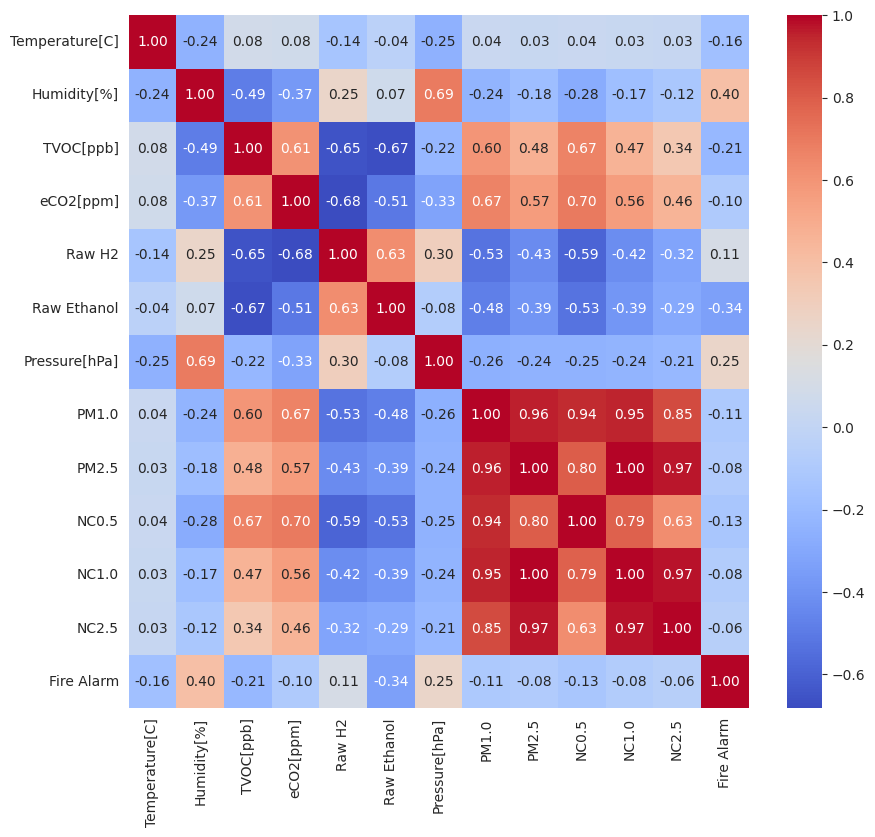

In [70]:
visualization_data = smoke_train.drop(columns=['Index', 'UTC', 'CNT'])
corr = visualization_data.corr()
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()
# показує графік на якому видно наскільки дані міжж собою корелюються 
# * діагональ -- показує, що сама із собою колонка є прямо овзаємопов'язана
# * TVOC, eCO2 -- дані, що пов'язані із вуглекислим гаазом і його концентрацією
# * humidity + Fire alarm -- взаємопов'язані т. як чим менше 
# * humidity + pressure теж пов'язані


<Axes: xlabel='Fire Alarm', ylabel='Humidity[%]'>

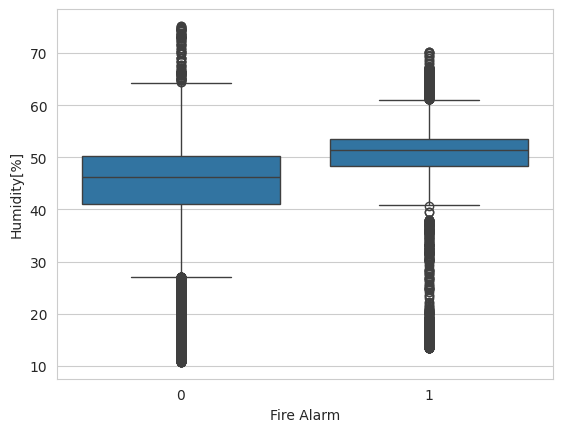

In [71]:
sns.boxplot(x='Fire Alarm', y='Humidity[%]', data=smoke_train)

<Axes: xlabel='Fire Alarm', ylabel='TVOC[ppb]'>

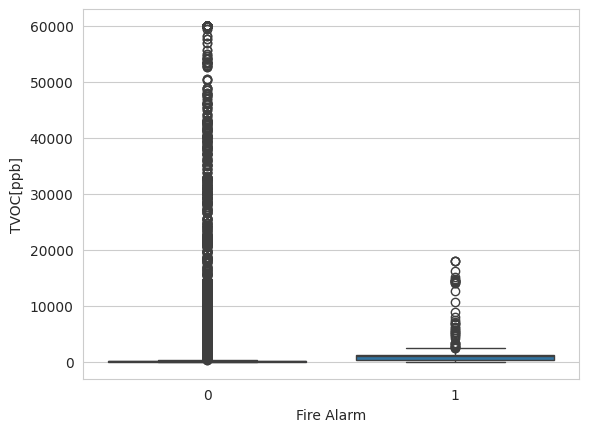

In [72]:
sns.boxplot(x='Fire Alarm', y='TVOC[ppb]', data=smoke_train)
# data differs a lot from each other

<Axes: xlabel='Fire Alarm', ylabel='Pressure[hPa]'>

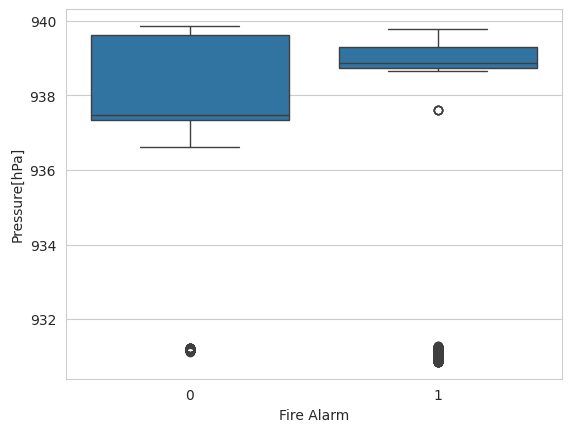

In [73]:
sns.boxplot(x='Fire Alarm', y='Pressure[hPa]', data=smoke_train)

<Axes: xlabel='Fire Alarm', ylabel='Raw Ethanol'>

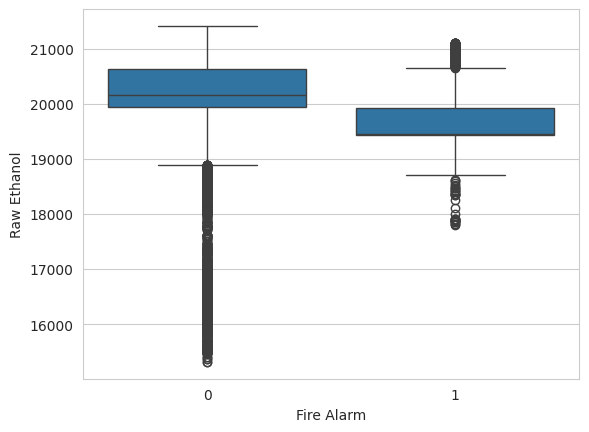

In [74]:
sns.boxplot(x='Fire Alarm', y='Raw Ethanol', data=smoke_train)

<Axes: xlabel='Raw Ethanol', ylabel='Count'>

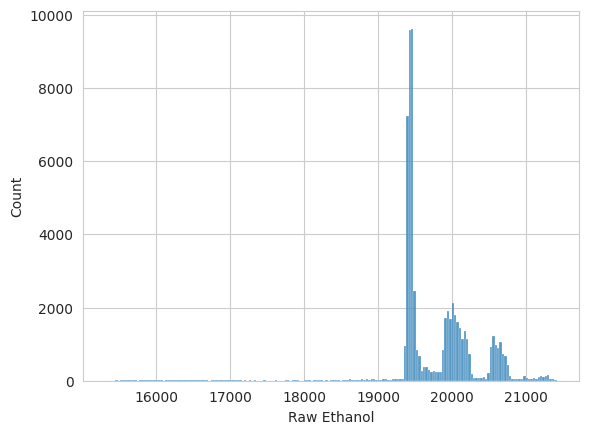

In [77]:
sns.histplot(data=smoke_train, x='Raw Ethanol')

<Axes: xlabel='Temperature[C]', ylabel='Count'>

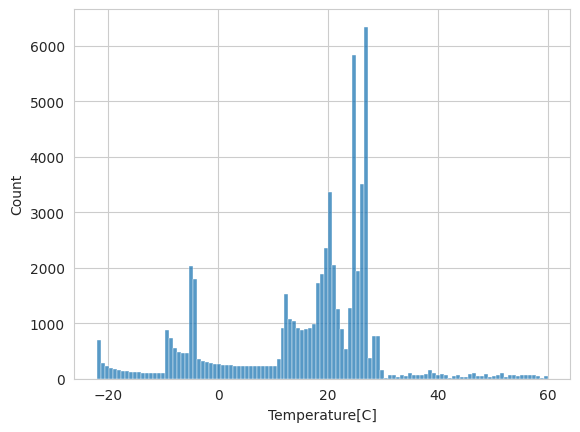

In [76]:
sns.histplot(data=smoke_train, x='Temperature[C]')